<a href="https://colab.research.google.com/github/Sowrobh1/DIP_LAB/blob/main/Sowrobh(2125051026).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [8]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmwla6vUQK67X5KHksARyVrL4Evo509hBcCA&s'  # Example grayscale-friendly image
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
gray = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

In [9]:
kernel = np.array([[1, 1, 1],
                   [1, 2, 1],
                   [1, 1, 1]], dtype=np.float32)
kernel /= kernel.sum()

In [10]:
def manual_filter(img, kernel):
    k = kernel.shape[0] // 2
    padded = cv2.copyMakeBorder(img, k, k, k, k, cv2.BORDER_REFLECT)
    filtered = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+3, j:j+3]
            filtered[i, j] = np.sum(region * kernel)
    return np.clip(filtered, 0, 255).astype(np.uint8)

manual_filtered = manual_filter(gray, kernel)

In [11]:
opencv_filtered = cv2.filter2D(gray, -1, kernel)


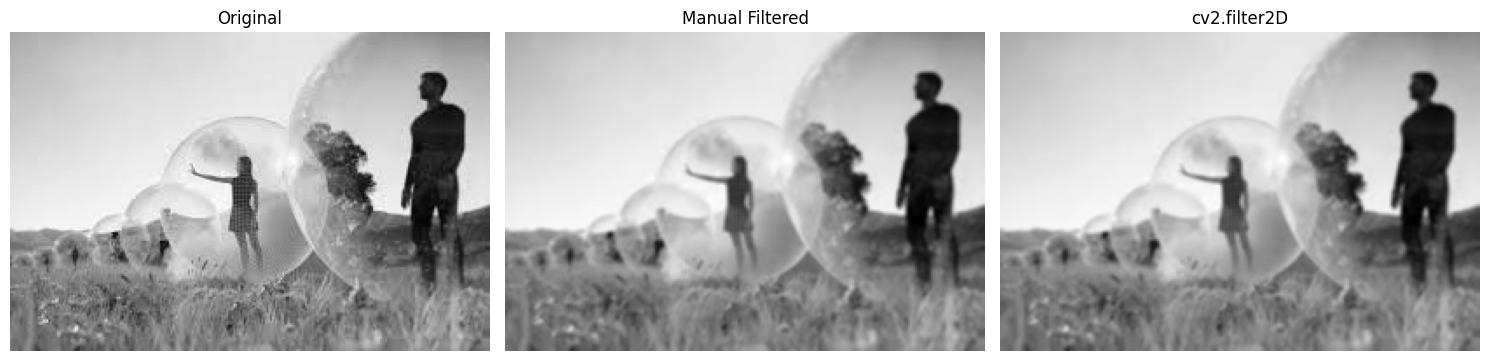

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Manual Filtered")
plt.imshow(manual_filtered, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("cv2.filter2D")
plt.imshow(opencv_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()










